<a href="https://colab.research.google.com/github/resonotech/seeds-clustering/blob/main/01_clustering_seed_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

For example, let's take a look at a dataset that contains measurements of different species of wheat seed.

> **Citation**: The seeds dataset used in this exercise was originally published by the Institute of Agrophysics of the Polish Academy of Sciences in Lublin by Dua, D. and Graff, C. (2019). and can be downloaded from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml), University of California at Irvine, School of Information and Computer Science.

In [1]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

--2024-07-21 16:45:59--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: ‘seeds.csv’

seeds.csv           100%[===================>]   9.17K  --.-KB/s    in 0s      

2024-07-21 16:45:59 (59.5 MB/s) - ‘seeds.csv’ saved [9386/9386]



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
9,16.44,15.25,0.8880,5.884,3.505,1.969
56,14.46,14.35,0.8818,5.388,3.377,2.802
198,12.62,13.67,0.8481,5.410,2.911,3.306
91,18.76,16.20,0.8984,6.172,3.796,3.120
114,20.97,17.25,0.8859,6.563,3.991,4.677
75,16.77,15.62,0.8638,5.927,3.438,4.920
69,12.73,13.75,0.8458,5.412,2.882,3.533
160,12.54,13.67,0.8425,5.451,2.879,3.082
61,11.23,12.63,0.8840,4.902,2.879,2.269
18,14.70,14.21,0.9153,5.205,3.466,1.767


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

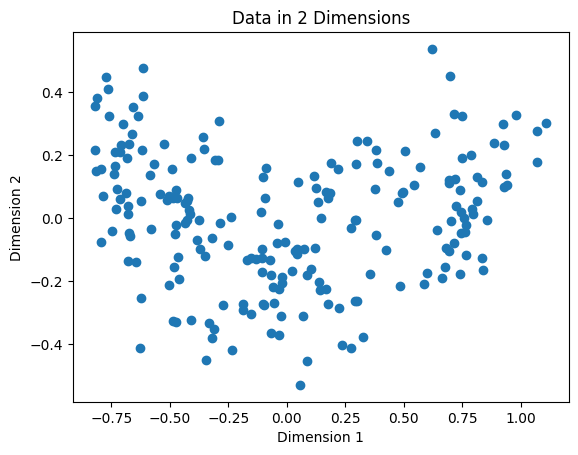

In [6]:
from ast import increment_lineno
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Data in 2 Dimensions")
plt.show()

**Figure shows three possible clusters however let see how many give best WCSS (within cluster sum of squares)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

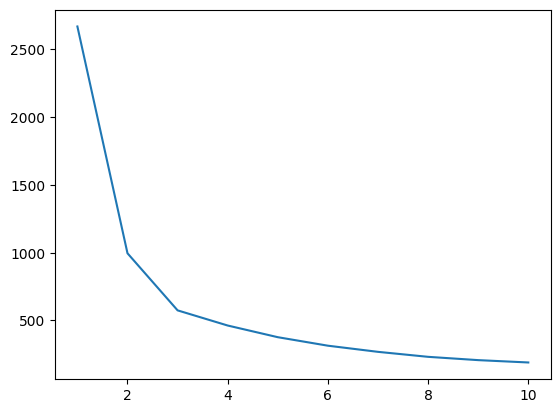

In [7]:
import numpy as no
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters =i)
  kmeans.fit(features.values)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.show()

The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.